In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

**Loading the Data**

In [200]:
df=pd.read_csv('C:\\Users\mamai\\OneDrive\\Desktop\\capstone\\WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data Overview

In [201]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [202]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We have to convert 'TotalCharges' to numeric, coerce errors to handle any non-numeric values

In [204]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [205]:
df.shape[0]

7043

In [206]:
df.shape[1]

21

# Feature Engineering

In [207]:
df['Tenure_MonthlyCharges'] = df['tenure'] * df['MonthlyCharges']
df['Tenure_MonthlyCharges']

0         29.85
1       1936.30
2        107.70
3       1903.50
4        141.40
         ...   
7038    2035.20
7039    7430.40
7040     325.60
7041     297.60
7042    6972.90
Name: Tenure_MonthlyCharges, Length: 7043, dtype: float64

In [208]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure_MonthlyCharges'],
      dtype='object')

In [209]:
df['AvgMonthlyCharge'] = df['TotalCharges'] / df['tenure']
print(df['AvgMonthlyCharge'])

0        29.850000
1        55.573529
2        54.075000
3        40.905556
4        75.825000
           ...    
7038     82.937500
7039    102.262500
7040     31.495455
7041     76.650000
7042    103.704545
Name: AvgMonthlyCharge, Length: 7043, dtype: float64


In [210]:
df['Log_TotalCharges'] = np.log1p(df['TotalCharges'])

In [211]:
# Create tenure groups
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, np.inf], 
                           labels=['0-12 Months', '12-24 Months', '24-48 Months', '48-60 Months', '60+ Months'])


In [212]:
df['TenureGroup'] = df['TenureGroup'].astype('object')

In [213]:
column_dtype = df['TenureGroup'].dtype
column_dtype

dtype('O')

In [214]:
df['TenureGroup'].value_counts()

TenureGroup
0-12 Months     2175
24-48 Months    1594
60+ Months      1407
12-24 Months    1024
48-60 Months     832
nan               11
Name: count, dtype: int64

In [215]:
df['IsSeniorCitizen'] = df['SeniorCitizen'].astype(int)

In [216]:
df['HasDependentsAndPartner'] = ((df['Dependents'] == True) & (df['Partner'] == True)).astype(int)
df['HasDependentsAndPartner']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: HasDependentsAndPartner, Length: 7043, dtype: int32

In [217]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_MonthlyCharges,AvgMonthlyCharge,Log_TotalCharges,TenureGroup,IsSeniorCitizen,HasDependentsAndPartner
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Electronic check,29.85,29.85,No,29.85,29.850000,3.429137,0-12 Months,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Mailed check,56.95,1889.50,No,1936.30,55.573529,7.544597,24-48 Months,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Mailed check,53.85,108.15,Yes,107.70,54.075000,4.692723,0-12 Months,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Bank transfer (automatic),42.30,1840.75,No,1903.50,40.905556,7.518471,24-48 Months,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Electronic check,70.70,151.65,Yes,141.40,75.825000,5.028148,0-12 Months,0,0


In [218]:
column_dtype = df['TenureGroup'].dtype
column_dtype

dtype('O')

# Data Preprocessing

**Missing Values**

Checking for missing values

In [219]:
missing_values=df.isnull().sum()
missing_values

customerID                  0
gender                      0
SeniorCitizen               0
Partner                     0
Dependents                  0
tenure                      0
PhoneService                0
MultipleLines               0
InternetService             0
OnlineSecurity              0
OnlineBackup                0
DeviceProtection            0
TechSupport                 0
StreamingTV                 0
StreamingMovies             0
Contract                    0
PaperlessBilling            0
PaymentMethod               0
MonthlyCharges              0
TotalCharges               11
Churn                       0
Tenure_MonthlyCharges       0
AvgMonthlyCharge           11
Log_TotalCharges           11
TenureGroup                 0
IsSeniorCitizen             0
HasDependentsAndPartner     0
dtype: int64

In [220]:
# List of columns to fill missing values
columns_to_fill = ['TotalCharges', 'AvgMonthlyCharge', 'Log_TotalCharges']

# Fill missing values with the median of each column
for column in columns_to_fill:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)


In [221]:
missing_values=df.isnull().sum()
missing_values

customerID                 0
gender                     0
SeniorCitizen              0
Partner                    0
Dependents                 0
tenure                     0
PhoneService               0
MultipleLines              0
InternetService            0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport                0
StreamingTV                0
StreamingMovies            0
Contract                   0
PaperlessBilling           0
PaymentMethod              0
MonthlyCharges             0
TotalCharges               0
Churn                      0
Tenure_MonthlyCharges      0
AvgMonthlyCharge           0
Log_TotalCharges           0
TenureGroup                0
IsSeniorCitizen            0
HasDependentsAndPartner    0
dtype: int64

There are no missing values in any column in the dataset

**Encoding Categorical Variables**

The customerID column is a unique identifier for each customer and should be dropped from the modeling process as it doesn't provide any useful information for prediction.

In [222]:
# Drop customerID as it is not useful for modeling
df = df.drop('customerID', axis=1)

In [223]:
missing=df.isnull().sum()
missing

gender                     0
SeniorCitizen              0
Partner                    0
Dependents                 0
tenure                     0
PhoneService               0
MultipleLines              0
InternetService            0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport                0
StreamingTV                0
StreamingMovies            0
Contract                   0
PaperlessBilling           0
PaymentMethod              0
MonthlyCharges             0
TotalCharges               0
Churn                      0
Tenure_MonthlyCharges      0
AvgMonthlyCharge           0
Log_TotalCharges           0
TenureGroup                0
IsSeniorCitizen            0
HasDependentsAndPartner    0
dtype: int64

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   7043 non-null   object 
 1   SeniorCitizen            7043 non-null   int64  
 2   Partner                  7043 non-null   object 
 3   Dependents               7043 non-null   object 
 4   tenure                   7043 non-null   int64  
 5   PhoneService             7043 non-null   object 
 6   MultipleLines            7043 non-null   object 
 7   InternetService          7043 non-null   object 
 8   OnlineSecurity           7043 non-null   object 
 9   OnlineBackup             7043 non-null   object 
 10  DeviceProtection         7043 non-null   object 
 11  TechSupport              7043 non-null   object 
 12  StreamingTV              7043 non-null   object 
 13  StreamingMovies          7043 non-null   object 
 14  Contract                

In [225]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Tenure_MonthlyCharges',
       'AvgMonthlyCharge', 'Log_TotalCharges', 'TenureGroup',
       'IsSeniorCitizen', 'HasDependentsAndPartner'],
      dtype='object')

In [226]:
cat_cols=df.select_dtypes(include=['object']).columns
print("Categorical Variables:")
print(cat_cols)

Categorical Variables:
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'TenureGroup'],
      dtype='object')


In [227]:
num_cols = df.select_dtypes(include=['float64','int64'])
num_cols

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Tenure_MonthlyCharges,AvgMonthlyCharge,Log_TotalCharges
0,0,1,29.85,29.85,29.85,29.850000,3.429137
1,0,34,56.95,1889.50,1936.30,55.573529,7.544597
2,0,2,53.85,108.15,107.70,54.075000,4.692723
3,0,45,42.30,1840.75,1903.50,40.905556,7.518471
4,0,2,70.70,151.65,141.40,75.825000,5.028148
...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,2035.20,82.937500,7.596643
7039,0,72,103.20,7362.90,7430.40,102.262500,8.904345
7040,0,11,29.60,346.45,325.60,31.495455,5.850621
7041,1,4,74.40,306.60,297.60,76.650000,5.728800


**Encoding**

One Hot Encoding and Label Encoding are going to be used. ONe-Hot encoding will be used where there is no inherent order between values in a category. Label encoding on the other hand will be used for the churn column since it is the target variable. "Yes" will be encoded as 1 and "No" as 0.

**One-Hot Encoding:** gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod


**Label Encoding:** Churn (as the target variable)

In [228]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

One-Hot Encoding

In [229]:
#Initializing one-hot encoding
one_hot_cols =['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [230]:
# Applying OneHotEncoding
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

Label Encoding

In [231]:
#Initializing label encoding
label_col ='Churn'

In [232]:
#pplying Label Encoding
label_encoder = LabelEncoder()
df[label_col] = label_encoder.fit_transform(df[label_col])

In [233]:
print(df.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure_MonthlyCharges', 'AvgMonthlyCharge', 'Log_TotalCharges',
       'TenureGroup', 'IsSeniorCitizen', 'HasDependentsAndPartner',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
 

In [234]:
# Check the data type of tenure group column
column_dtype = df['TenureGroup'].dtype
column_dtype

dtype('O')

In [235]:
column_dtype = df['TenureGroup'].dtype
column_dtype

dtype('O')

In [236]:
df['TenureGroup'].value_counts()

TenureGroup
0-12 Months     2175
24-48 Months    1594
60+ Months      1407
12-24 Months    1024
48-60 Months     832
nan               11
Name: count, dtype: int64

In [248]:
ordinal_categories=['0-12 Months', '12-24 Months', '24-48 Months', '48-60 Months', '60+ Months','nan']

In [238]:
df.dropna(subset=['TenureGroup'], inplace=True)

In [239]:
# Fill missing values with 'Unknown' for categorical columns
df['TenureGroup'].fillna('Unknown', inplace=True)

In [241]:
# Check for NaNs
print(df.isna().sum())

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
Tenure_MonthlyCharges                    0
AvgMonthlyCharge                         0
Log_TotalCharges                         0
TenureGroup                              0
IsSeniorCitizen                          0
HasDependentsAndPartner                  0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProte

In [249]:
df['TenureGroup'].value_counts()

TenureGroup
0-12 Months     2175
24-48 Months    1594
60+ Months      1407
12-24 Months    1024
48-60 Months     832
nan               11
Name: count, dtype: int64

In [244]:
# Example: Fill NaNs with a specific value or drop rows/columns
df = df.fillna('Unknown')  # or df.dropna() depending on your strategy

In [250]:
tenure_encoder = LabelEncoder()
tenure_encoder = LabelEncoder().fit(ordinal_categories)
df['TenureGroup'] = tenure_encoder.transform(df['TenureGroup'])

In [251]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Tenure_MonthlyCharges,AvgMonthlyCharge,Log_TotalCharges,TenureGroup,IsSeniorCitizen,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,29.85,29.850000,3.429137,0,0,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,1936.30,55.573529,7.544597,2,0,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,107.70,54.075000,4.692723,0,0,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,1903.50,40.905556,7.518471,2,0,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,141.40,75.825000,5.028148,0,0,...,False,False,False,False,False,False,True,False,True,False


In [252]:
df.to_csv('Telco-Customer-Churn-Preprocessed.csv', index=False)

**Scaling numerical features**

Standardized Scaling

In [253]:
from sklearn.preprocessing import StandardScaler

In [254]:
# Load your dataset
df = pd.read_csv('Telco-Customer-Churn-Preprocessed.csv')

In [255]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Tenure_MonthlyCharges,AvgMonthlyCharge,Log_TotalCharges,TenureGroup,IsSeniorCitizen,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,29.85,29.850000,3.429137,0,0,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,1936.30,55.573529,7.544597,2,0,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,107.70,54.075000,4.692723,0,0,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,1903.50,40.905556,7.518471,2,0,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,141.40,75.825000,5.028148,0,0,...,False,False,False,False,False,False,True,False,True,False


In [256]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure_MonthlyCharges', 'AvgMonthlyCharge', 'Log_TotalCharges',
       'TenureGroup', 'IsSeniorCitizen', 'HasDependentsAndPartner',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
 

In [257]:
# List of numerical columns to scale
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [258]:
# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting and transforming the numerical features
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check the scaled data
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Tenure_MonthlyCharges,AvgMonthlyCharge,Log_TotalCharges,TenureGroup,IsSeniorCitizen,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994242,0,29.85,29.850000,3.429137,0,0,...,False,False,False,False,False,False,True,False,True,False
1,0,0.066327,-0.259629,-0.173244,0,1936.30,55.573529,7.544597,2,0,...,False,False,False,False,True,False,False,False,False,True
2,0,-1.236724,-0.362660,-0.959674,1,107.70,54.075000,4.692723,0,0,...,False,False,False,False,False,False,True,False,False,True
3,0,0.514251,-0.746535,-0.194766,0,1903.50,40.905556,7.518471,2,0,...,False,False,False,False,True,False,False,False,False,False
4,0,-1.236724,0.197365,-0.940470,1,141.40,75.825000,5.028148,0,0,...,False,False,False,False,False,False,True,False,True,False


# Exploratory Data Analysis

**Missing Values**

In [259]:
missing_values=df.isnull().sum()
missing_values

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
Tenure_MonthlyCharges                    0
AvgMonthlyCharge                         0
Log_TotalCharges                         0
TenureGroup                              0
IsSeniorCitizen                          0
HasDependentsAndPartner                  0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProte

There are missing values in the total charges column, since its a numerical column, we fill it using the mean/,median

Finding the Number of Unique Values

In [260]:
df.nunique()

SeniorCitizen                               2
tenure                                     73
MonthlyCharges                           1585
TotalCharges                             6531
Churn                                       2
Tenure_MonthlyCharges                    6018
AvgMonthlyCharge                         6570
Log_TotalCharges                         6531
TenureGroup                                 6
IsSeniorCitizen                             2
HasDependentsAndPartner                     1
gender_Male                                 2
Partner_Yes                                 2
Dependents_Yes                              2
PhoneService_Yes                            2
MultipleLines_No phone service              2
MultipleLines_Yes                           2
InternetService_Fiber optic                 2
InternetService_No                          2
OnlineSecurity_No internet service          2
OnlineSecurity_Yes                          2
OnlineBackup_No internet service  

**Statistical Summary**

In [261]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Tenure_MonthlyCharges,AvgMonthlyCharge,Log_TotalCharges,TenureGroup,IsSeniorCitizen,HasDependentsAndPartner
count,7043.000000,7.043000e+03,7.043000e+03,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.0
mean,0.162147,-2.421273e-17,-6.406285e-17,-1.488074e-17,0.265370,2279.581350,64.808129,6.943855,1.759336,0.162147,0.0
std,0.368612,1.000071e+00,1.000071e+00,1.000071e+00,0.441561,2264.729447,30.163108,1.545275,1.501447,0.368612,0.0
min,0.000000,-1.318165e+00,-1.545860e+00,-9.991203e-01,0.000000,0.000000,13.775000,2.985682,0.000000,0.000000,0.0
25%,0.000000,-9.516817e-01,-9.725399e-01,-8.298459e-01,0.000000,394.000000,36.255000,5.999494,0.000000,0.000000,0.0
50%,0.000000,-1.372744e-01,1.857327e-01,-3.904632e-01,0.000000,1393.600000,70.373239,7.243138,2.000000,0.000000,0.0
75%,0.000000,9.214551e-01,8.338335e-01,6.642871e-01,1.000000,3786.100000,90.174158,8.239488,3.000000,0.000000,0.0
max,1.000000,1.613701e+00,1.794352e+00,2.826743e+00,1.000000,8550.000000,121.400000,9.069445,5.000000,1.000000,0.0


In [262]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['float64','int64'])
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index([], dtype='object')
Numerical Variables:
      SeniorCitizen    tenure  MonthlyCharges  TotalCharges  Churn  \
0                 0 -1.277445       -1.160323     -0.994242      0   
1                 0  0.066327       -0.259629     -0.173244      0   
2                 0 -1.236724       -0.362660     -0.959674      1   
3                 0  0.514251       -0.746535     -0.194766      0   
4                 0 -1.236724        0.197365     -0.940470      1   
...             ...       ...             ...           ...    ...   
7038              0 -0.340876        0.665992     -0.128655      0   
7039              0  1.613701        1.277533      2.243151      0   
7040              0 -0.870241       -1.168632     -0.854469      0   
7041              1 -1.155283        0.320338     -0.872062      1   
7042              0  1.369379        1.358961      2.014288      0   

      Tenure_MonthlyCharges  AvgMonthlyCharge  Log_TotalCharges  TenureGroup  \
0        

**Distribution Of Churn**


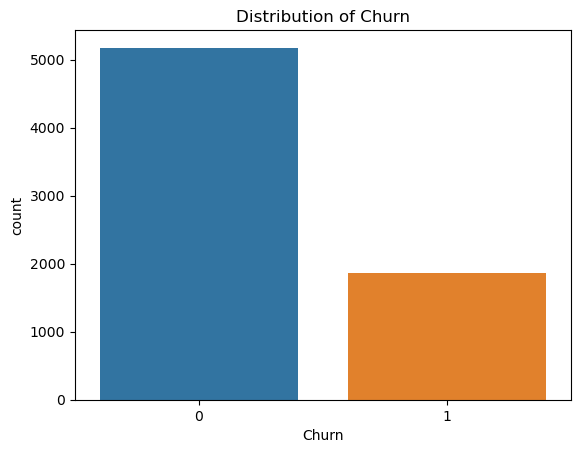

In [263]:
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

Finding the percentage of customers who churned


In [264]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
churn_rate

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

**Skew**

SeniorCitizen
Skew : 1.83


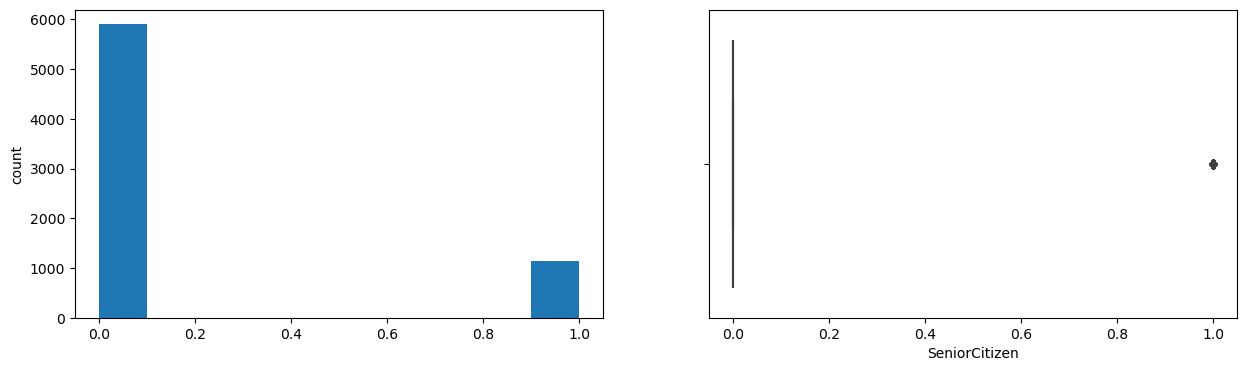

tenure
Skew : 0.24


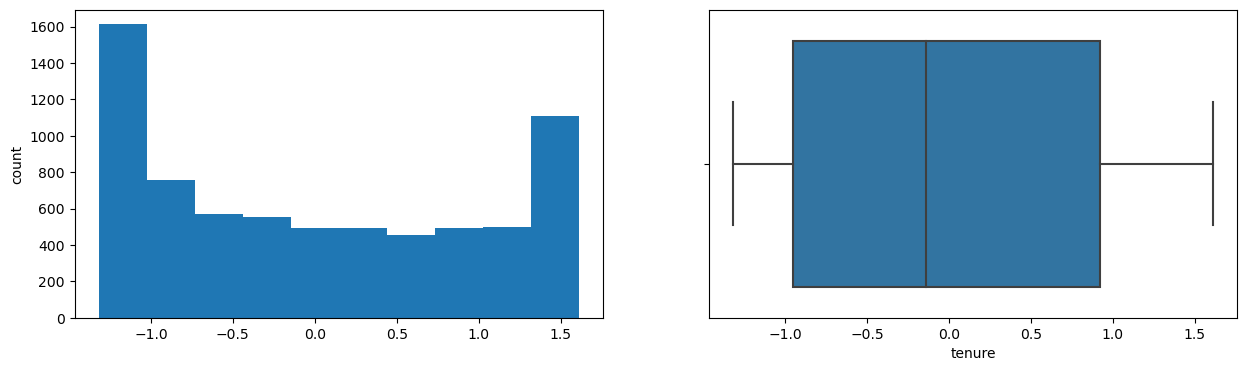

MonthlyCharges
Skew : -0.22


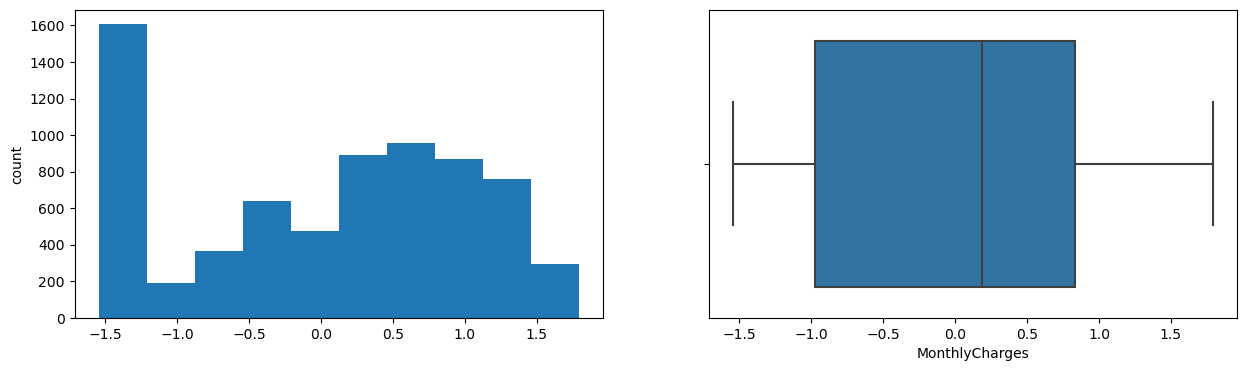

TotalCharges
Skew : 0.96


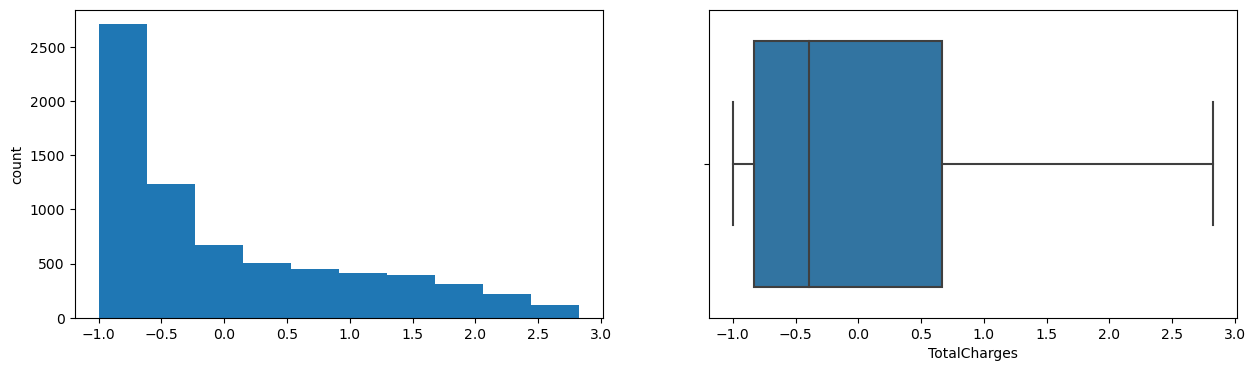

Churn
Skew : 1.06


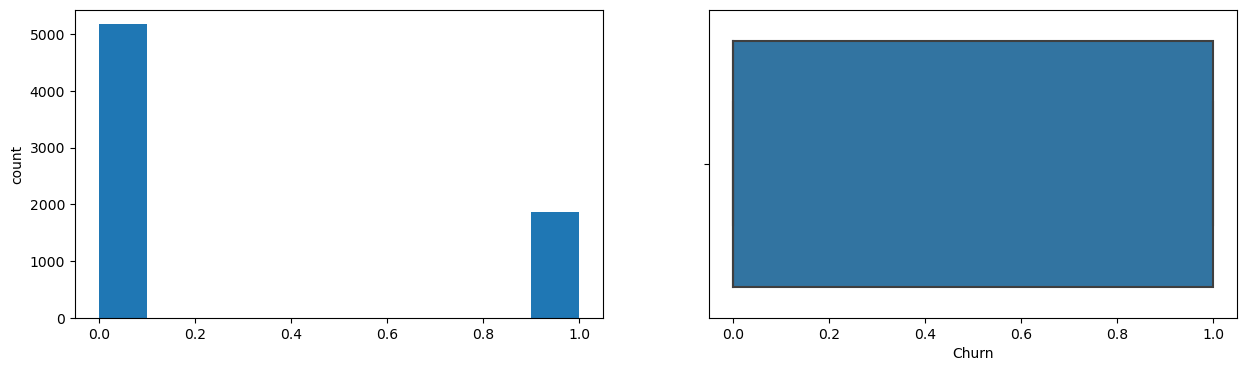

Tenure_MonthlyCharges
Skew : 0.96


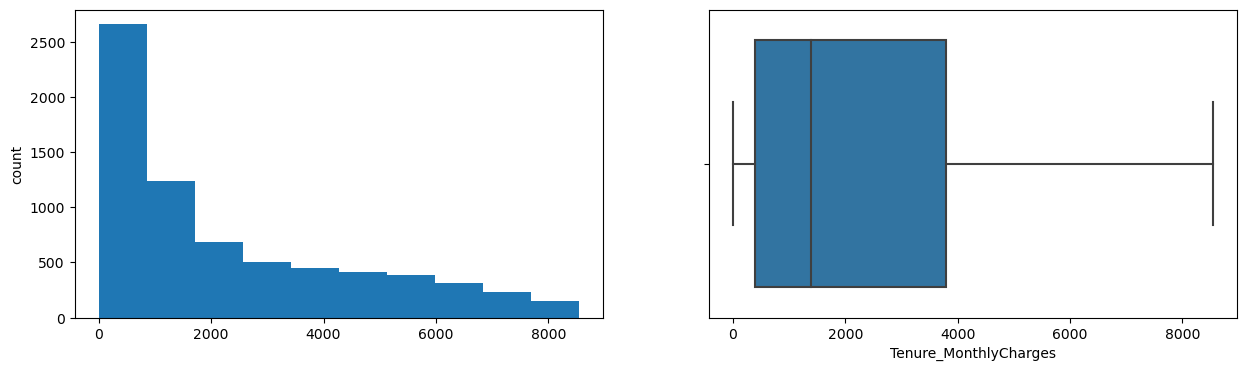

AvgMonthlyCharge
Skew : -0.21


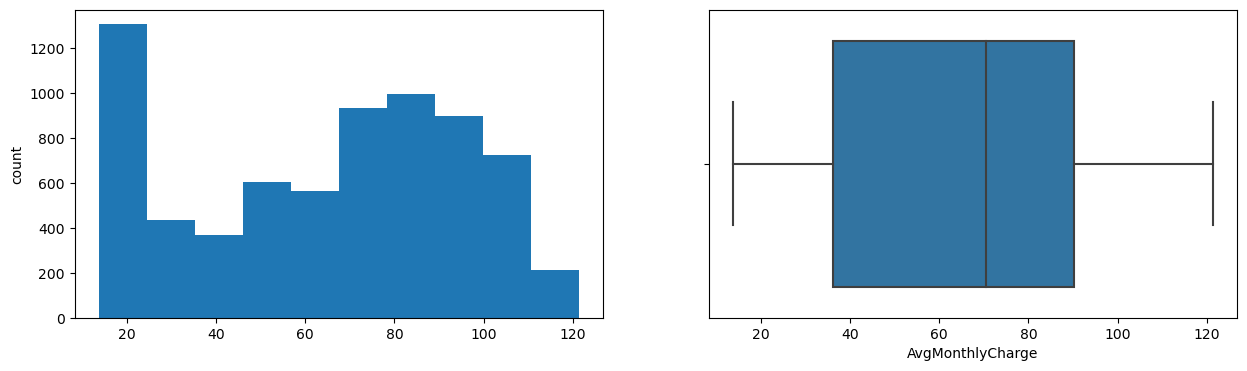

Log_TotalCharges
Skew : -0.74


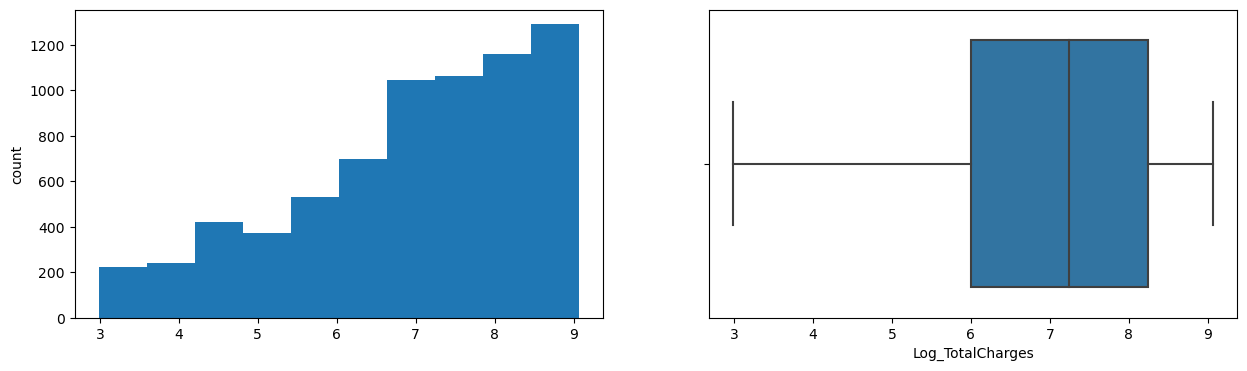

TenureGroup
Skew : 0.23


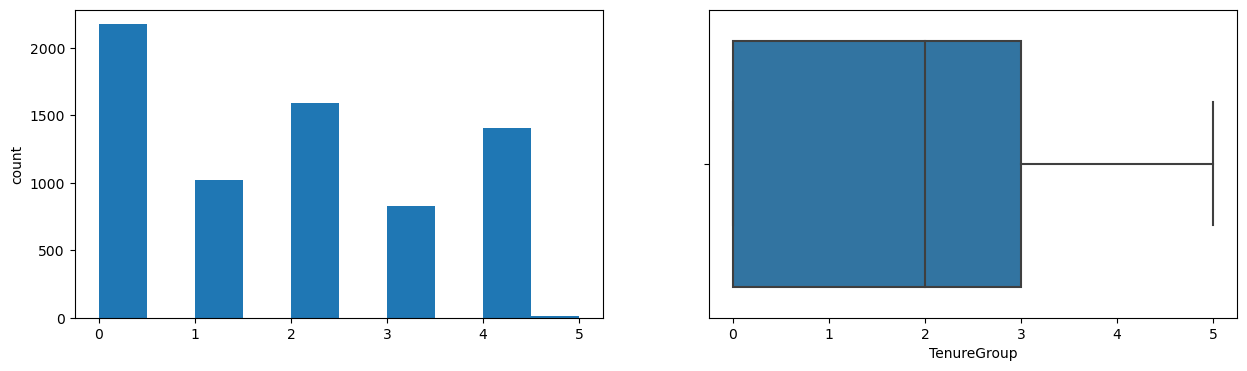

IsSeniorCitizen
Skew : 1.83


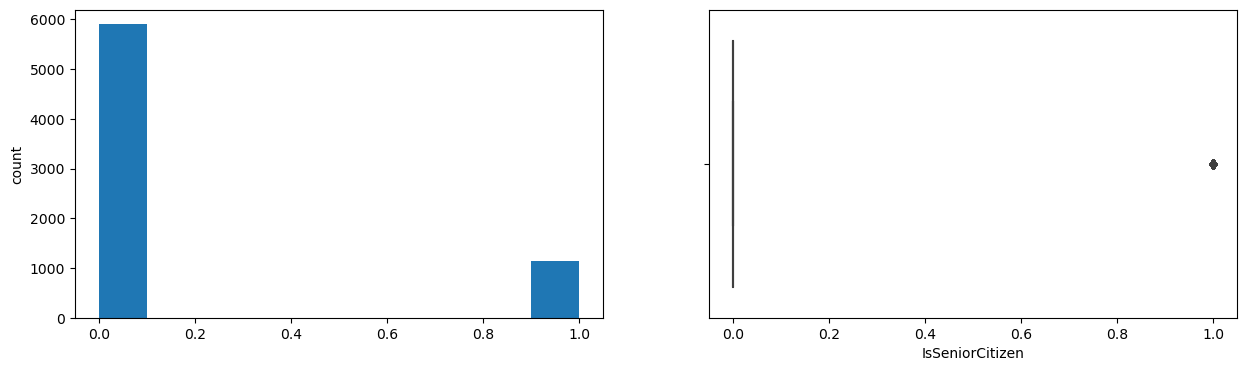

HasDependentsAndPartner
Skew : 0


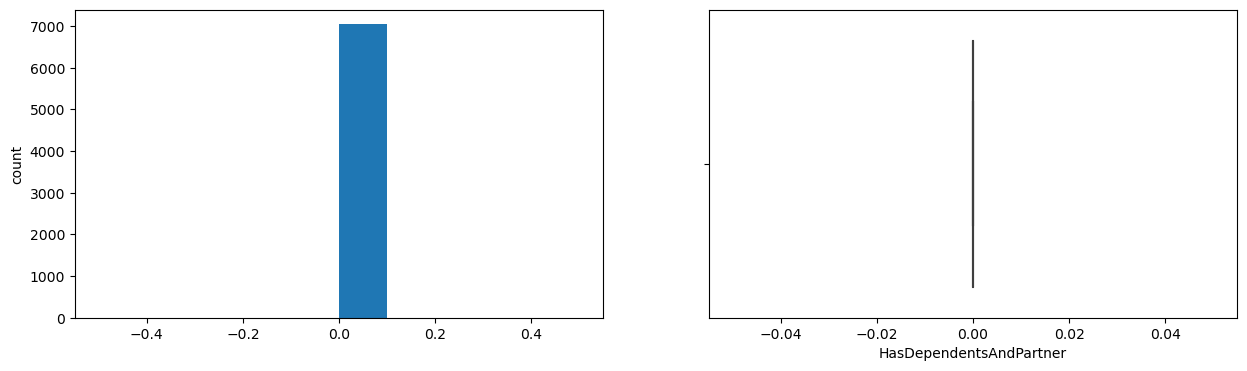

In [265]:
#finding skew
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

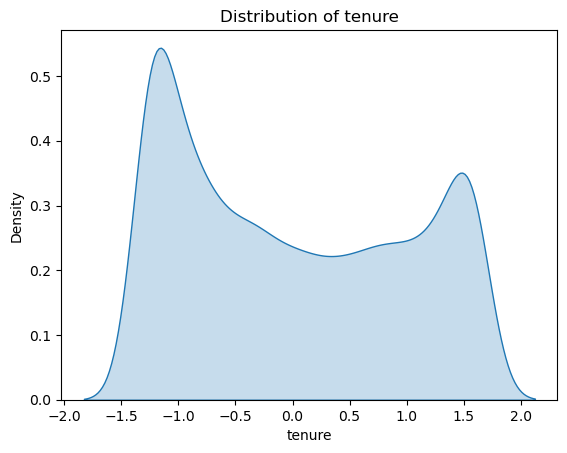

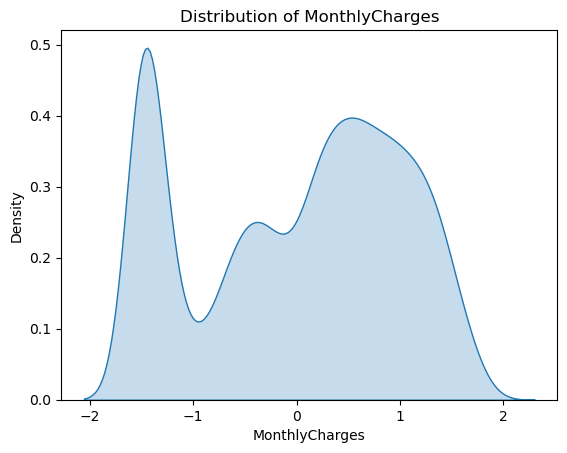

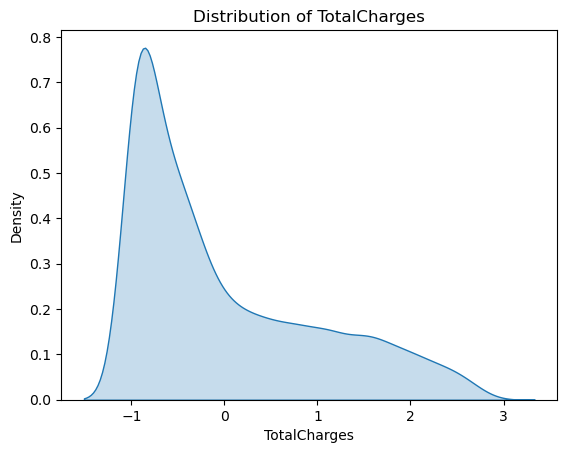

In [266]:
for column in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    sns.kdeplot(df[column], fill=True)
    plt.title(f'Distribution of {column}')
    plt.show()


**Here's a summary of the key findings:**

**Variable Distributions**

* **SeniorCitizen:** A categorical variable with a majority of individuals not being senior citizens.
* **tenure:** A numerical variable skewed to the right, indicating a larger proportion of customers with shorter tenures.
* **MonthlyCharges:** A numerical variable skewed to the right, indicating a larger proportion of customers with lower monthly charges.
* **TotalCharges:** A numerical variable skewed to the right, indicating a larger proportion of customers with lower total charges.

**General Observations**

* **Outliers:** No outliers were found in any of the variables.
* **Distribution Patterns:** All variables exhibited a right-skewed distribution, suggesting a concentration of values at the lower end of the range.
* **Median Values:** The median values for tenure, monthly charges, and total charges were relatively moderate, suggesting a central tendency towards the middle of the range.
* **Percentile Ranges:** The box plots provided insights into the spread of the data. For example, the box for tenure showed a significant portion of customers with tenures between 15 and 45 months.

**Overall, the analysis indicates that the dataset contains a customer base with a mix of short- and long-tenured customers, with a general tendency towards lower monthly and total charges. The lack of outliers suggests a relatively consistent distribution of these variables.**


c:\Users\mamai\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


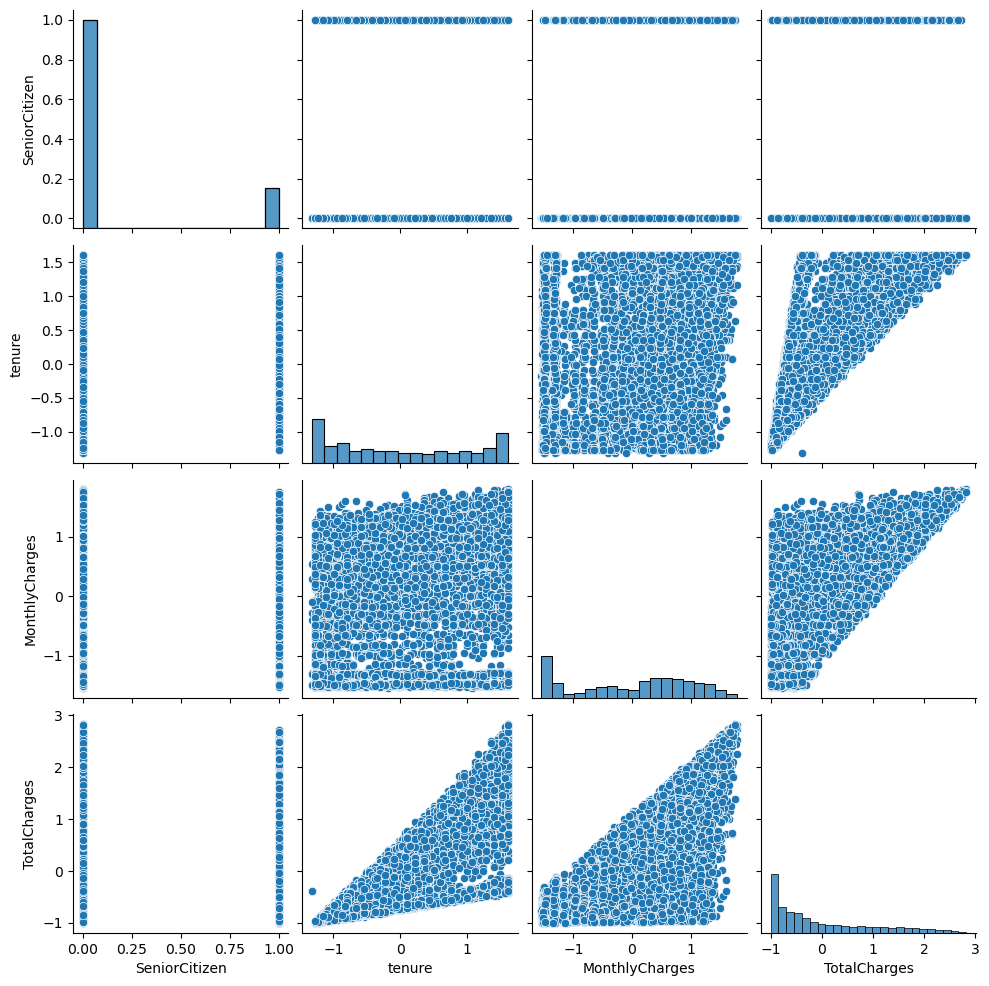

In [267]:
sns.pairplot(df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']])
plt.show()

**Key Observations:**

* **SeniorCitizen:** This variable is categorical, and its distribution is shown on the diagonal. The majority of observations have a value of 0 (not a senior citizen), with a smaller number having a value of 1 (senior citizen).
* **tenure:** This variable is numerical and has a right-skewed distribution, indicating a larger proportion of customers with shorter tenures.
* **MonthlyCharges:** This variable is also numerical and has a right-skewed distribution, suggesting a larger proportion of customers with lower monthly charges.
* **TotalCharges:** This variable is numerical and also has a right-skewed distribution, similar to MonthlyCharges, indicating a larger proportion of customers with lower total charges.

**Relationships Between Variables:**

* **SeniorCitizen vs. other variables:** There is no clear relationship between SeniorCitizen and the other variables. The scatter plots show a random distribution of points.
* **tenure vs. other variables:** There appears to be a positive correlation between tenure and MonthlyCharges. As tenure increases, MonthlyCharges tend to increase as well. Similarly, there is a positive correlation between tenure and TotalCharges, suggesting that customers with longer tenures have higher total charges.
* **MonthlyCharges vs. TotalCharges:** There is a strong positive correlation between MonthlyCharges and TotalCharges, as expected. As MonthlyCharges increase, TotalCharges also increase.

**Overall, the pair plot provides a visual representation of the relationships between the variables. While there is a clear positive correlation between tenure and both MonthlyCharges and TotalCharges, there is no significant relationship between SeniorCitizen and the other variables.**

**Correlation Analysis**

In [268]:
# Correlation matrix
corr_matrix = num_cols.corr()
corr_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Tenure_MonthlyCharges,AvgMonthlyCharge,Log_TotalCharges,TenureGroup,IsSeniorCitizen,HasDependentsAndPartner
SeniorCitizen,1.000000,0.016567,0.220173,0.102652,0.150889,0.103261,0.217451,0.100687,0.016893,1.000000,NaN
tenure,0.016567,1.000000,0.247900,0.825464,-0.352229,0.826568,0.245476,0.832374,0.971950,0.016567,NaN
MonthlyCharges,0.220173,0.247900,1.000000,0.650864,0.193356,0.651566,0.995074,0.573984,0.240105,0.220173,NaN
TotalCharges,0.102652,0.825464,0.650864,1.000000,-0.199037,0.999263,0.650708,0.832020,0.807370,0.102652,NaN
Churn,0.150889,-0.352229,0.193356,-0.199037,1.000000,-0.198514,0.191800,-0.242014,-0.345320,0.150889,NaN
Tenure_MonthlyCharges,0.103261,0.826568,0.651566,0.999263,-0.198514,1.000000,0.648784,0.831354,0.805248,0.103261,NaN
AvgMonthlyCharge,0.217451,0.245476,0.995074,0.650708,0.191800,0.648784,1.000000,0.574860,0.242561,0.217451,NaN
Log_TotalCharges,0.100687,0.832374,0.573984,0.832020,-0.242014,0.831354,0.574860,1.000000,0.811182,0.100687,NaN
TenureGroup,0.016893,0.971950,0.240105,0.807370,-0.345320,0.805248,0.242561,0.811182,1.000000,0.016893,NaN
IsSeniorCitizen,1.000000,0.016567,0.220173,0.102652,0.150889,0.103261,0.217451,0.100687,0.016893,1.000000,NaN


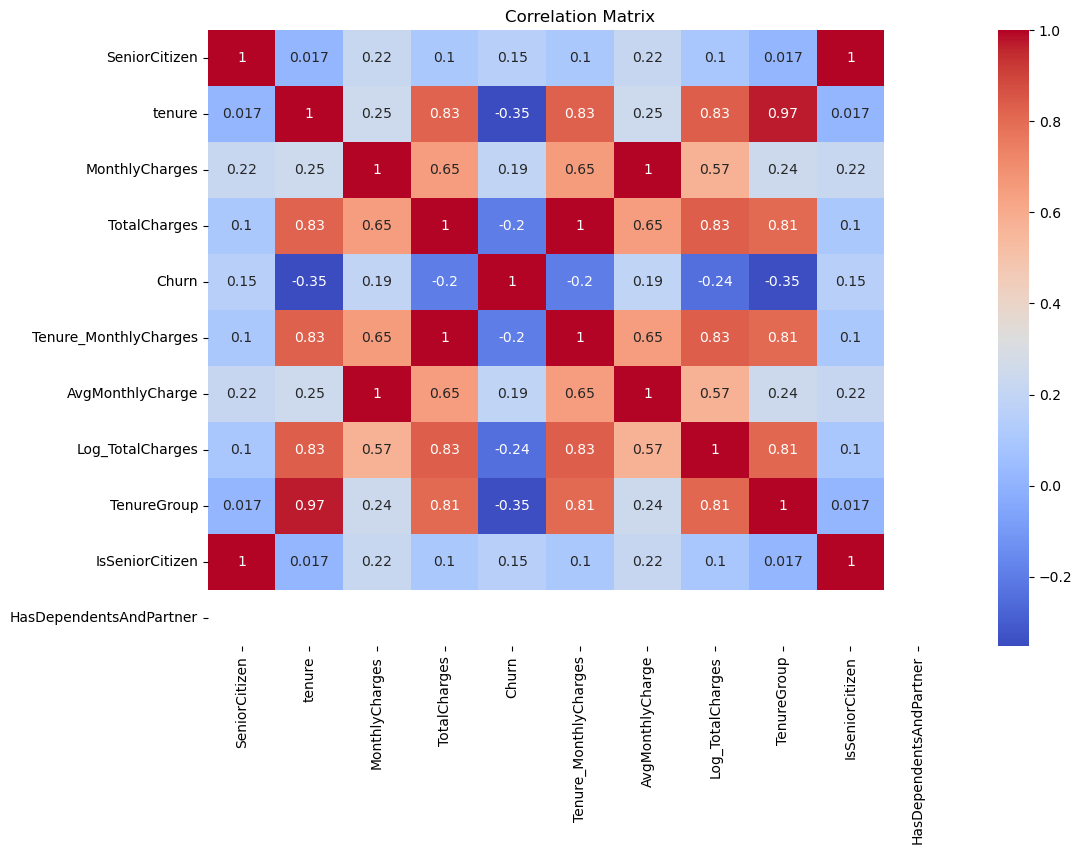

In [269]:
# Heatmap for visualizing correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Key Observations:**

* **SeniorCitizen:** This variable has a weak positive correlation with tenure (0.017) and a very weak positive correlation with MonthlyCharges (0.1) and TotalCharges (0.22). This suggests that being a senior citizen has a minimal impact on tenure, monthly charges, and total charges.
* **tenure:** This variable has a moderate positive correlation with MonthlyCharges (0.25) and a strong positive correlation with TotalCharges (0.83). This indicates that customers with longer tenures tend to have higher monthly charges and total charges.
* **MonthlyCharges:** This variable has a strong positive correlation with TotalCharges (0.65), as expected. Customers with higher monthly charges will also have higher total charges.

**Overall, the correlation matrix confirms the findings from the pair plot:**

* There is a strong positive relationship between tenure and both MonthlyCharges and TotalCharges.
* There is no significant relationship between SeniorCitizen and the other variables.

**In conclusion, the analysis indicates that customer tenure is a strong predictor of both monthly charges and total charges, while being a senior citizen has a minimal impact on these variables.**

**Analyzing Categorical Features**

In [270]:
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']

In [271]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure_MonthlyCharges', 'AvgMonthlyCharge', 'Log_TotalCharges',
       'TenureGroup', 'IsSeniorCitizen', 'HasDependentsAndPartner',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
 

Count Plots


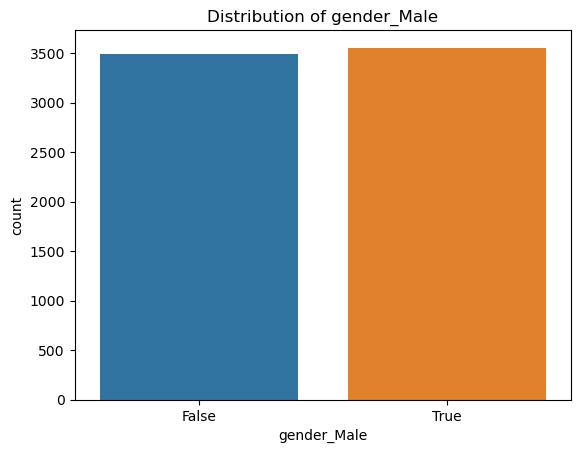

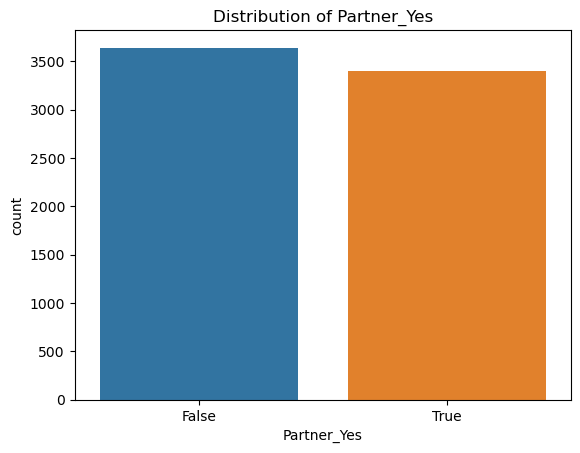

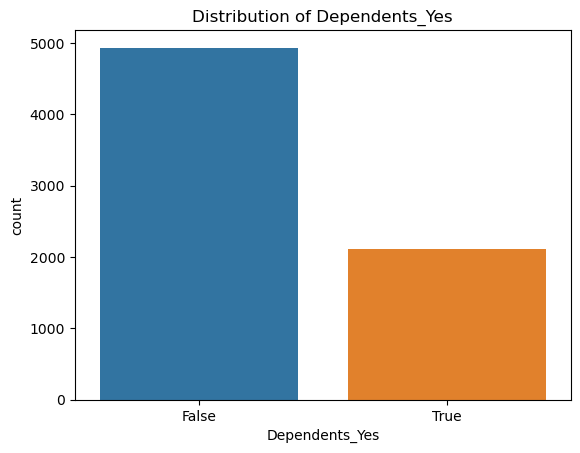

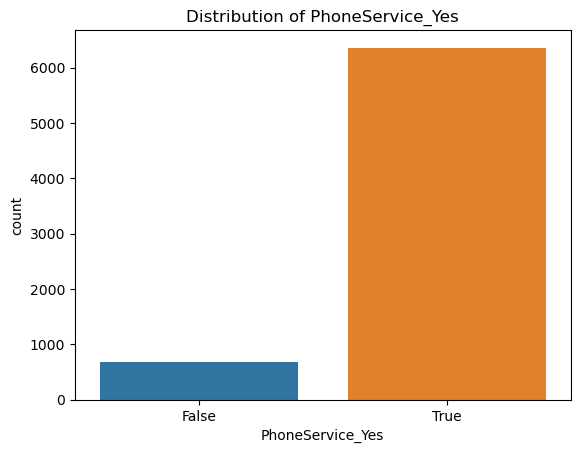

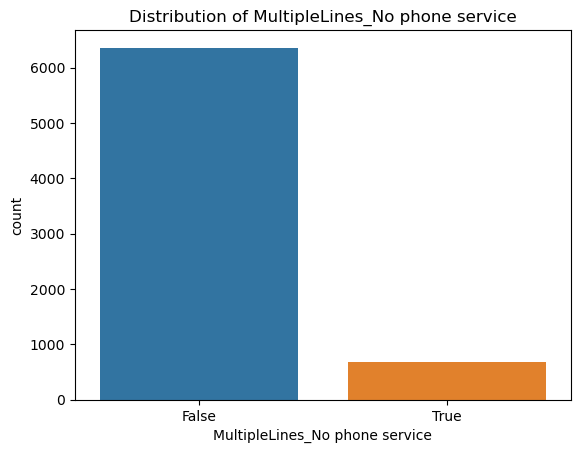

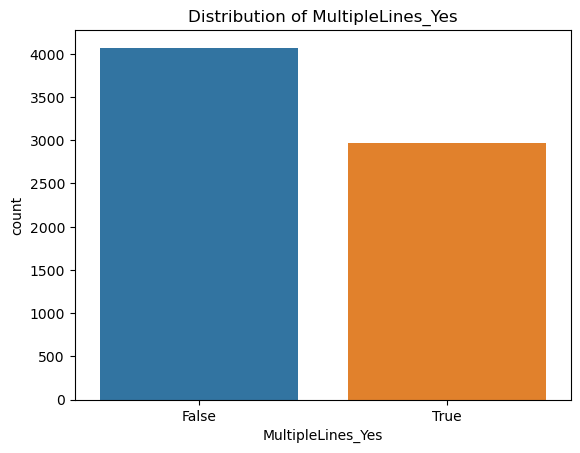

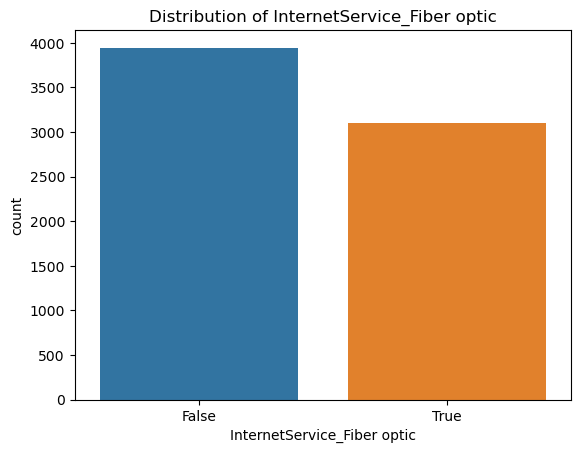

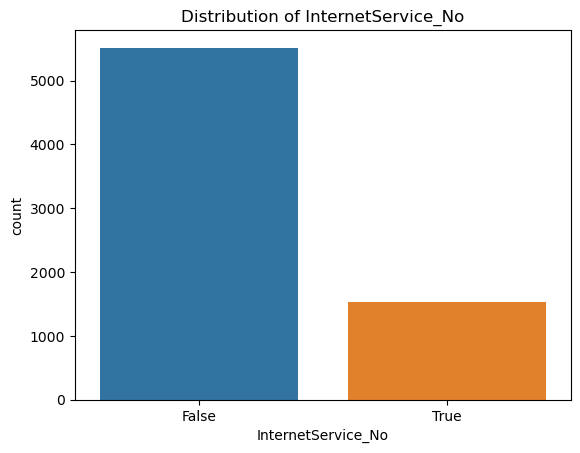

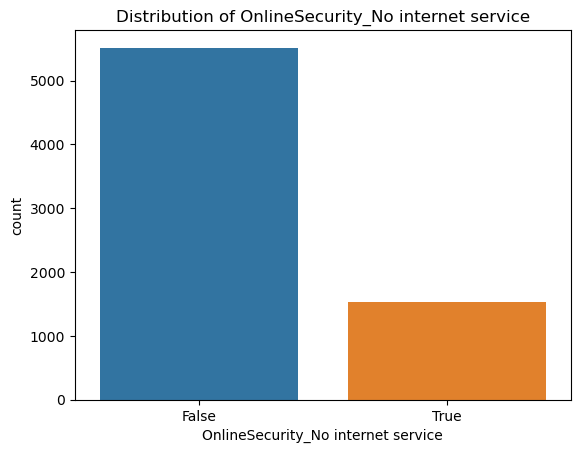

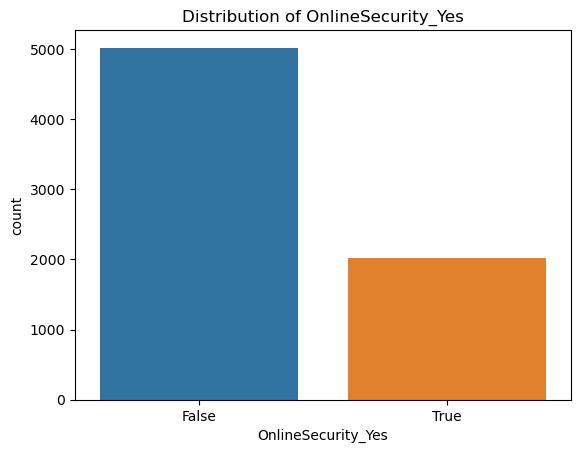

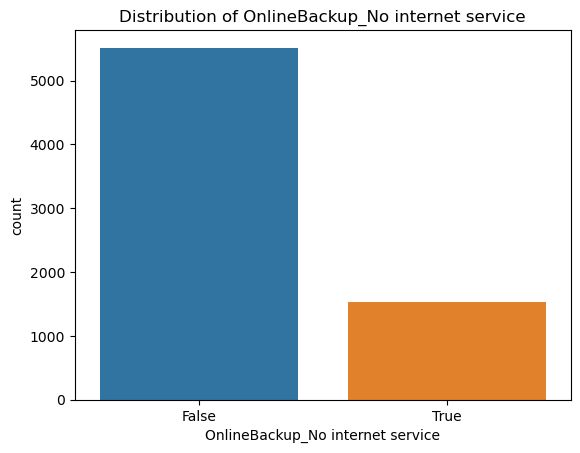

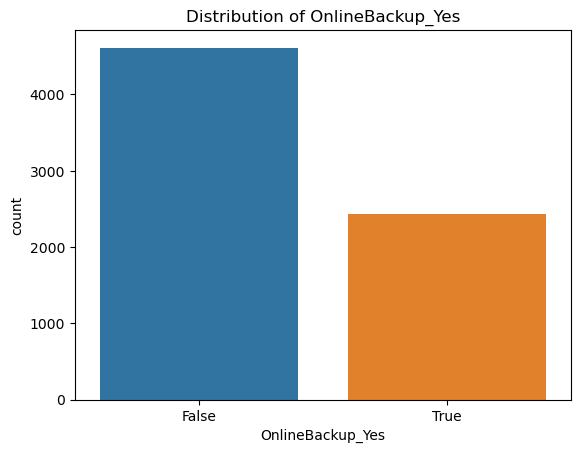

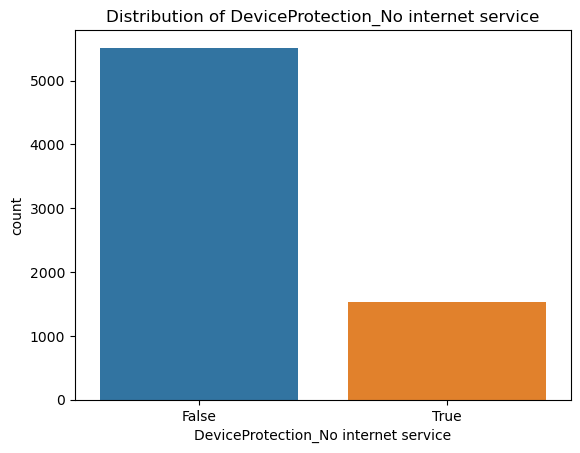

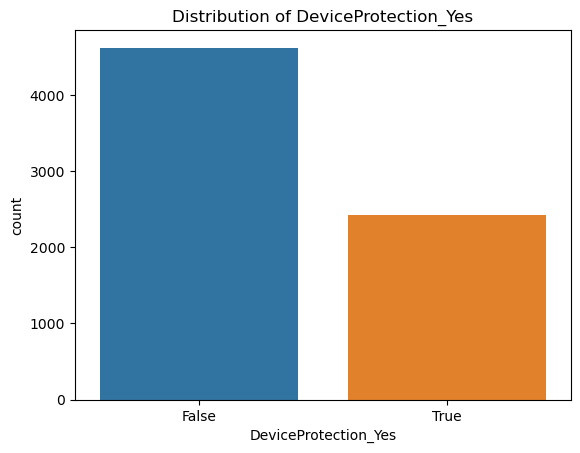

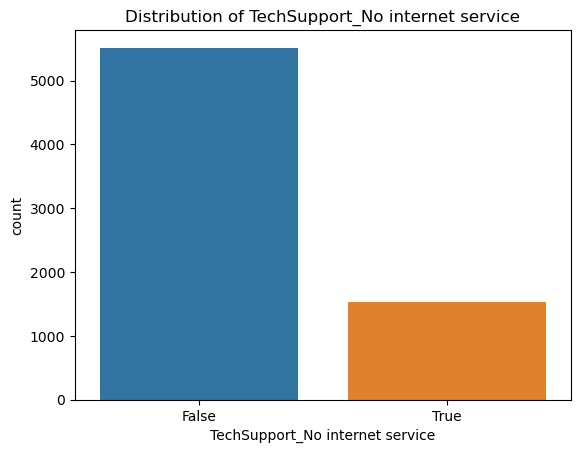

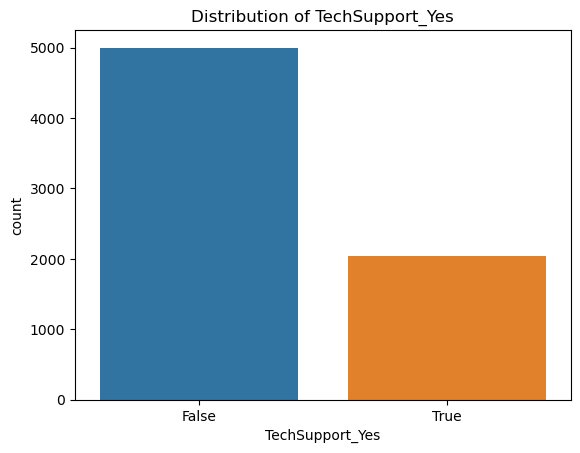

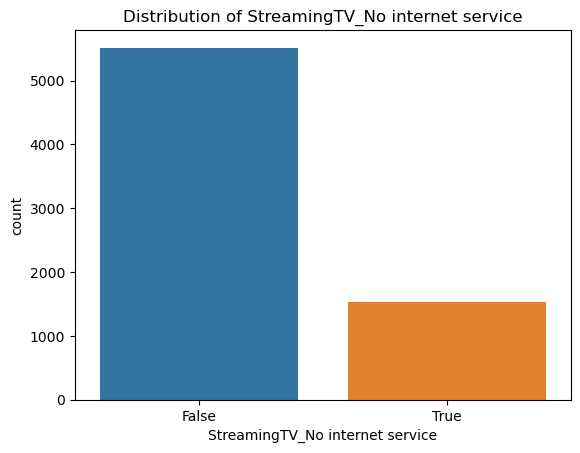

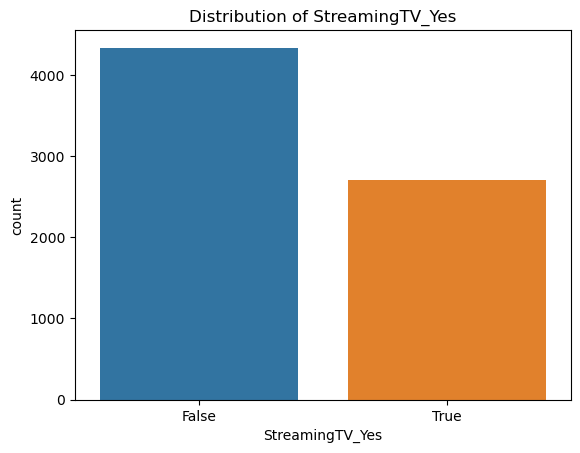

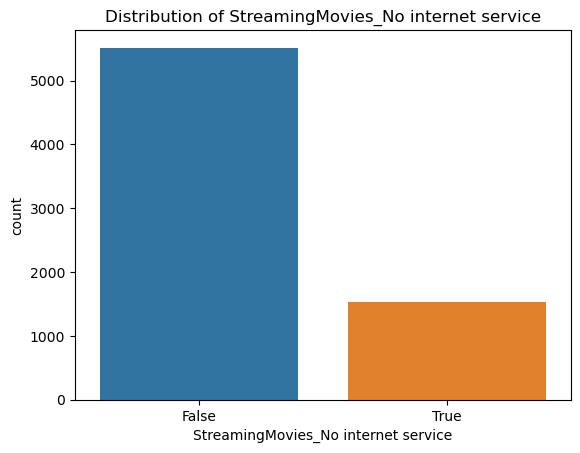

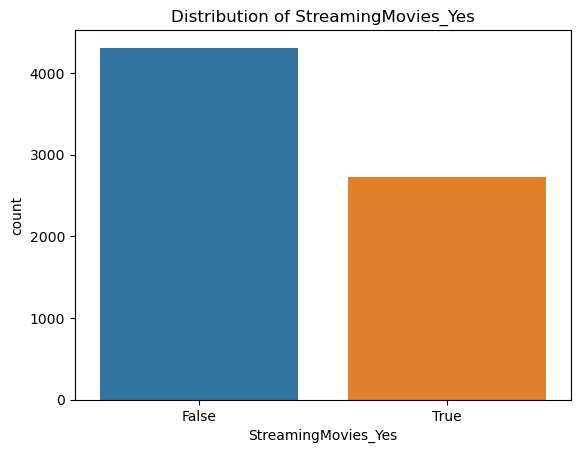

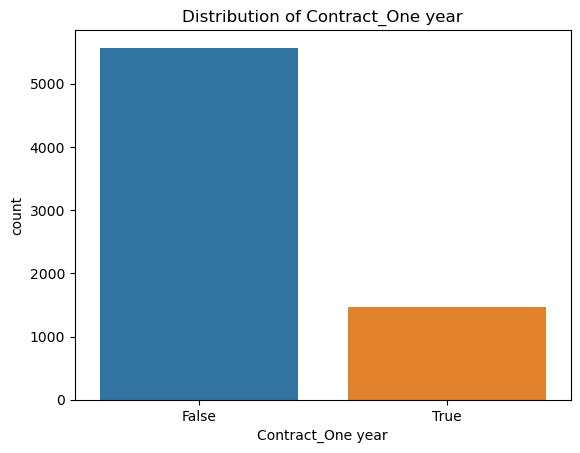

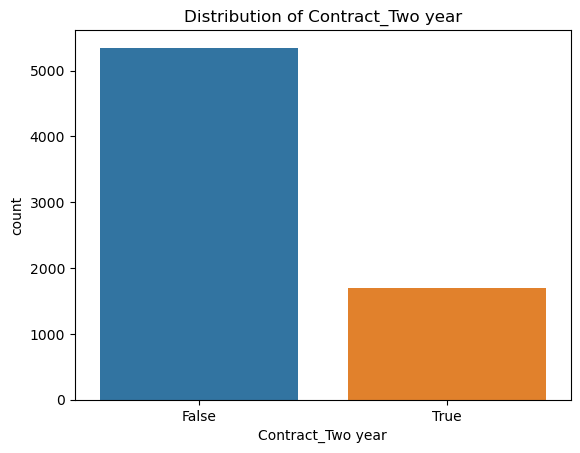

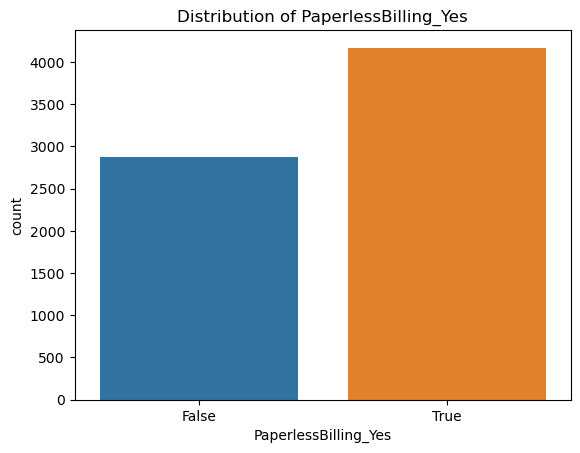

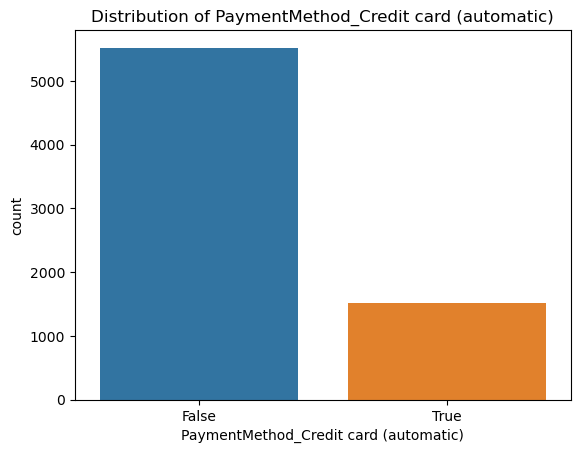

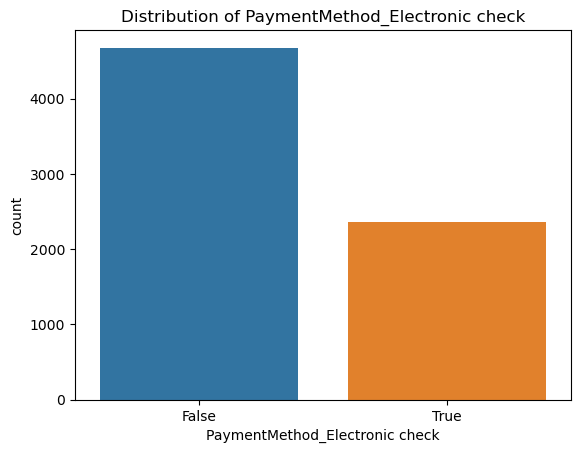

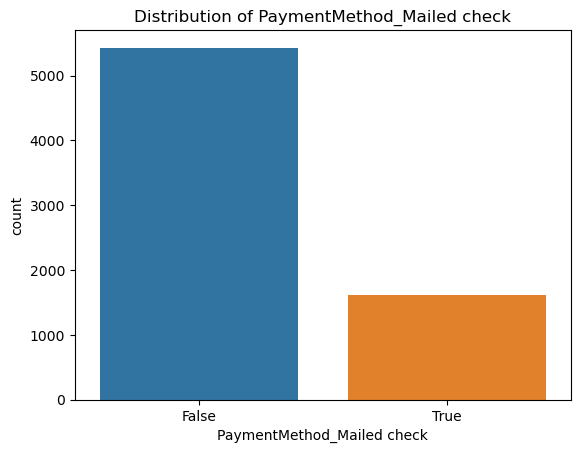

In [272]:
# List of the new one-hot encoded features
encoded_features = ['gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
                    'MultipleLines_No phone service', 'MultipleLines_Yes','InternetService_Fiber optic', 'InternetService_No',
                    'OnlineSecurity_No internet service', 'OnlineSecurity_Yes','OnlineBackup_No internet service', 'OnlineBackup_Yes',
                    'DeviceProtection_No internet service', 'DeviceProtection_Yes','TechSupport_No internet service', 'TechSupport_Yes',
                    'StreamingTV_No internet service', 'StreamingTV_Yes','StreamingMovies_No internet service', 'StreamingMovies_Yes',
                    'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check', 'PaymentMethod_Mailed check' ]

for feature in encoded_features:
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()


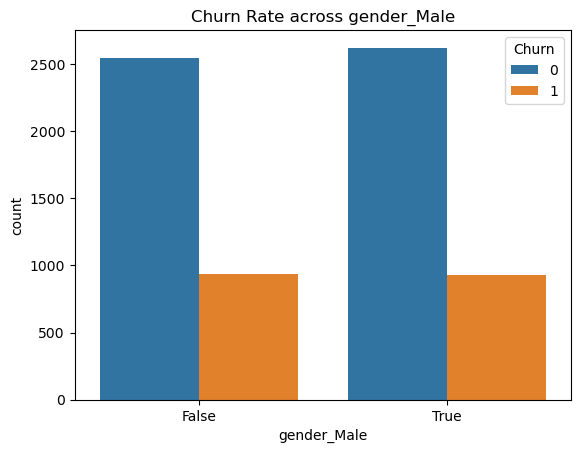

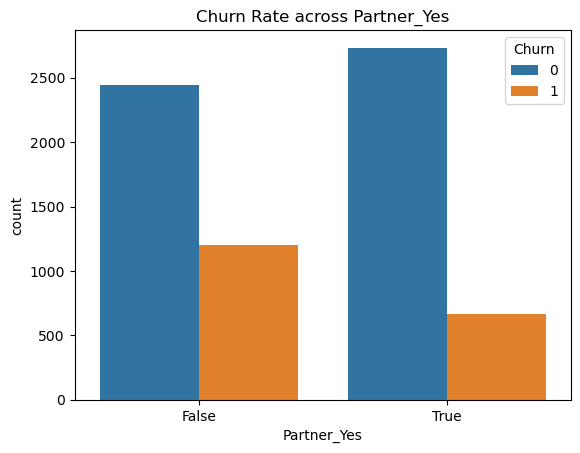

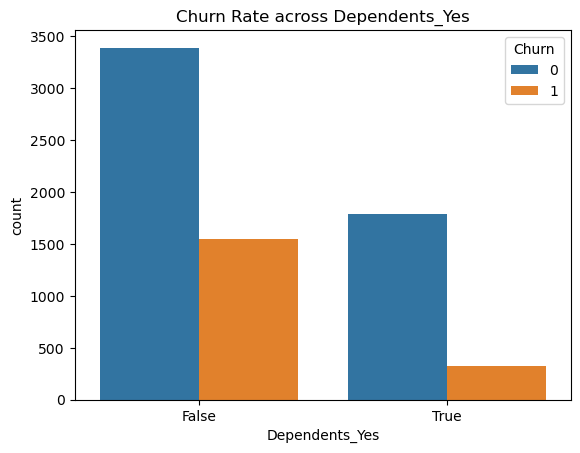

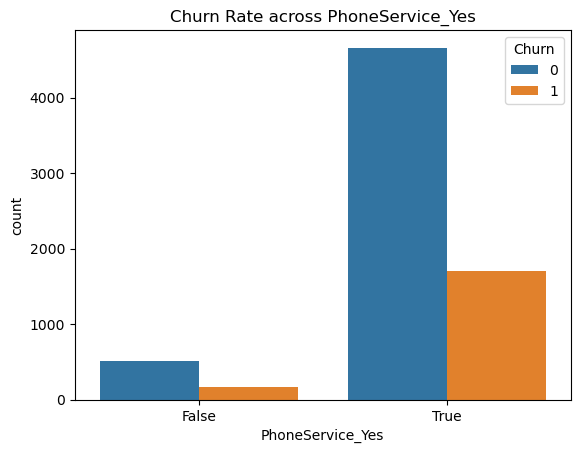

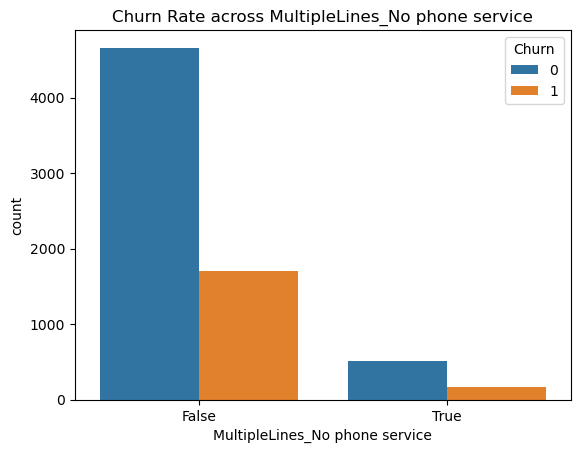

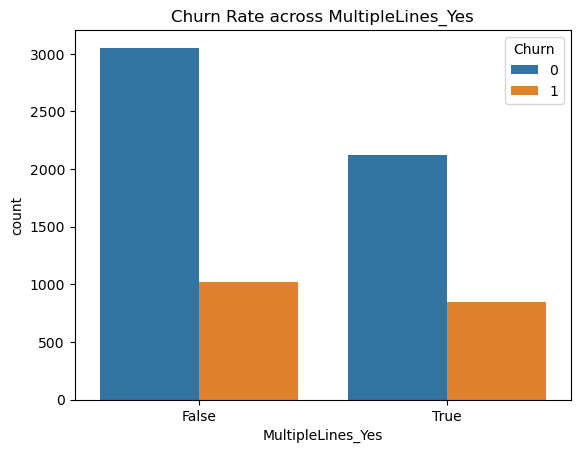

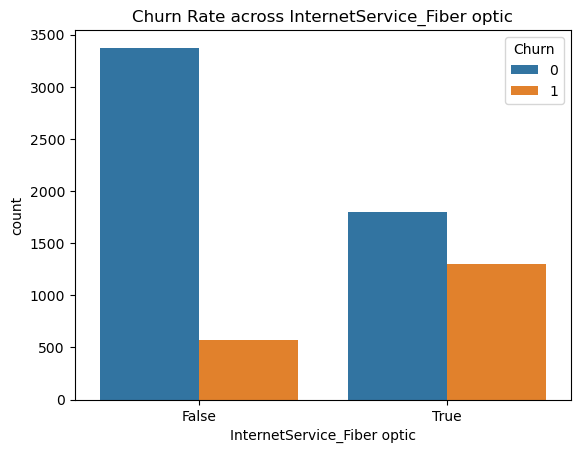

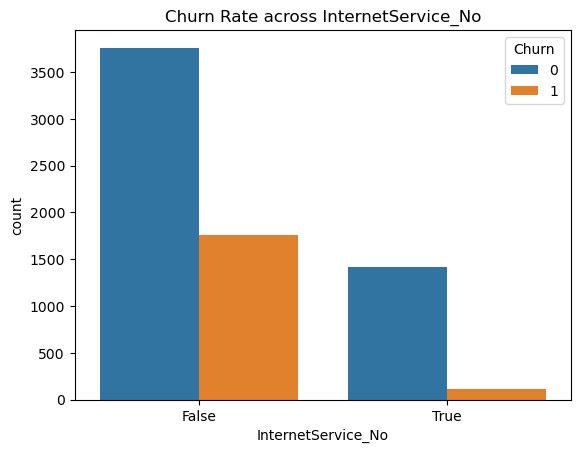

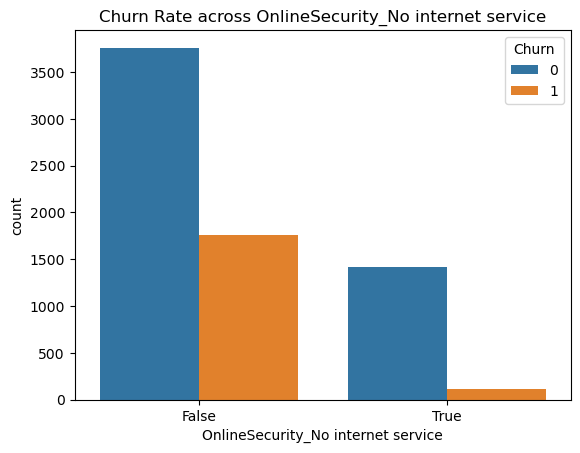

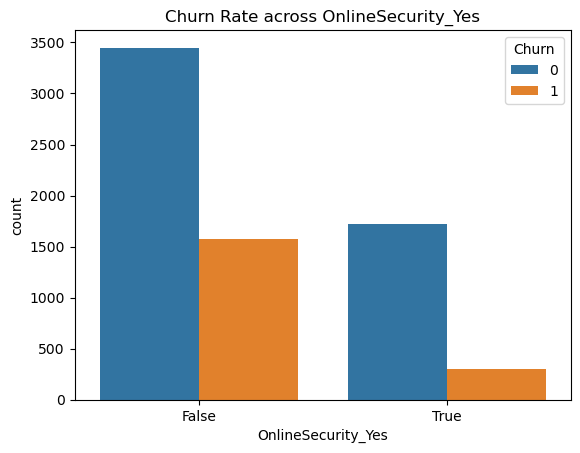

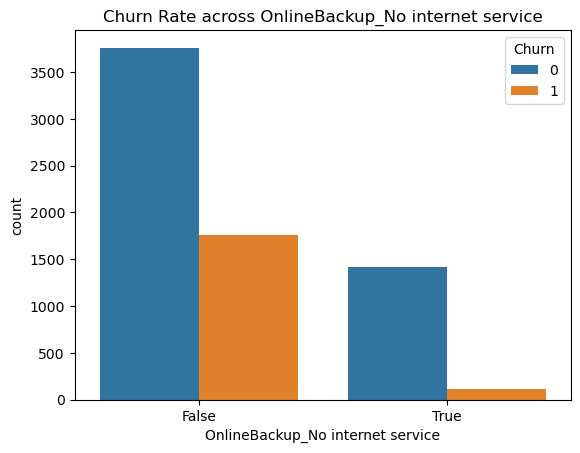

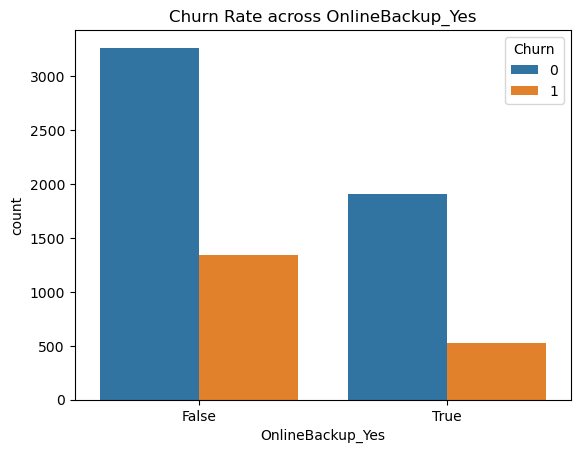

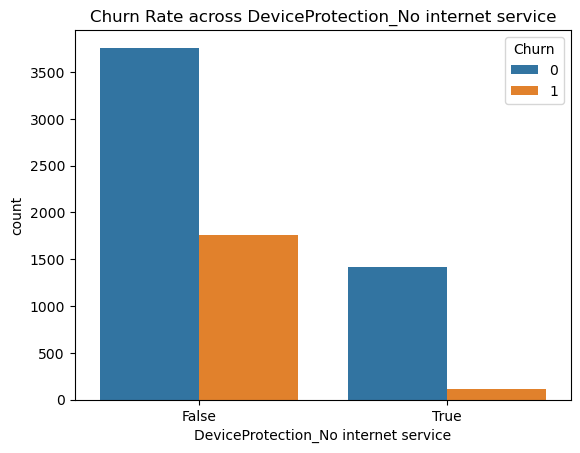

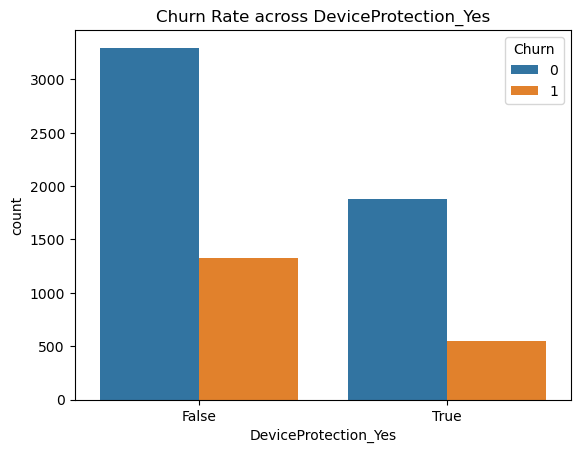

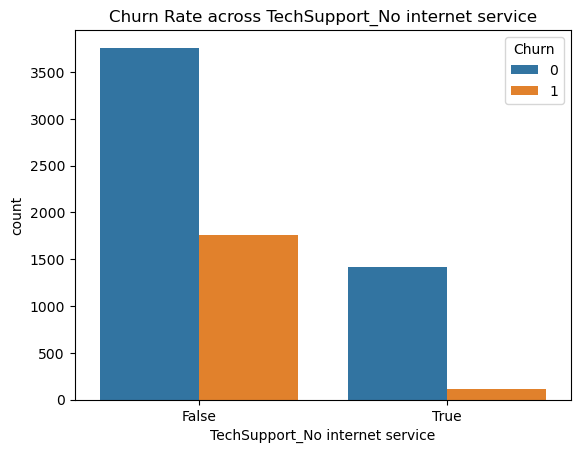

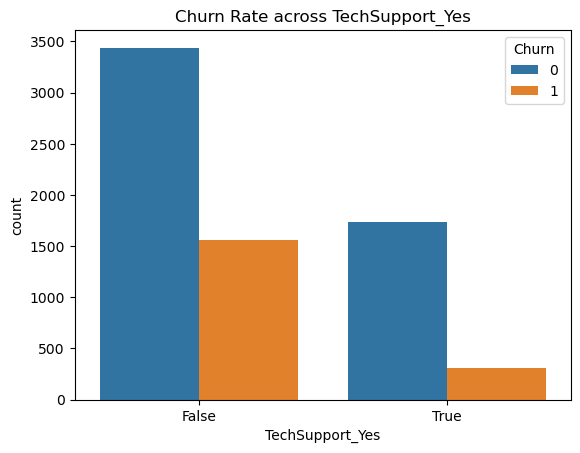

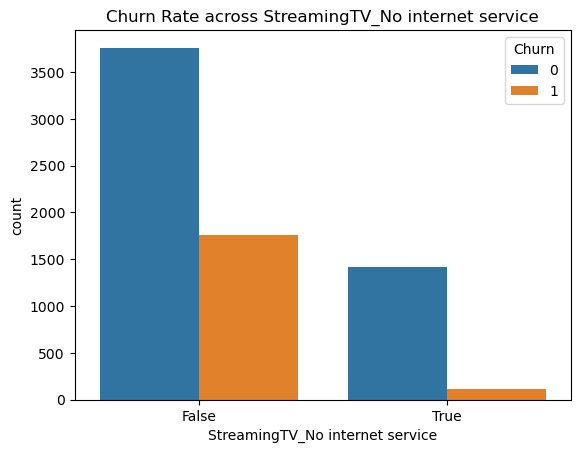

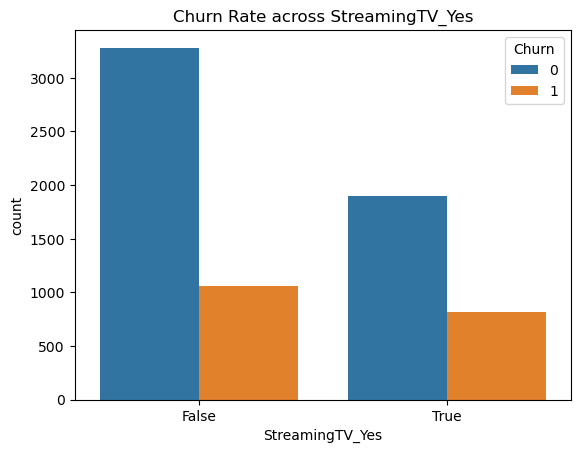

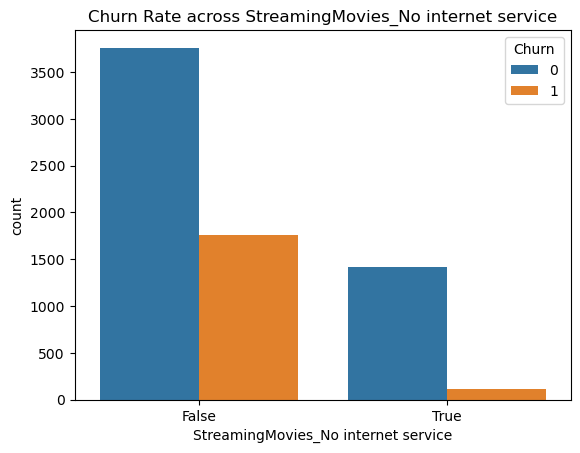

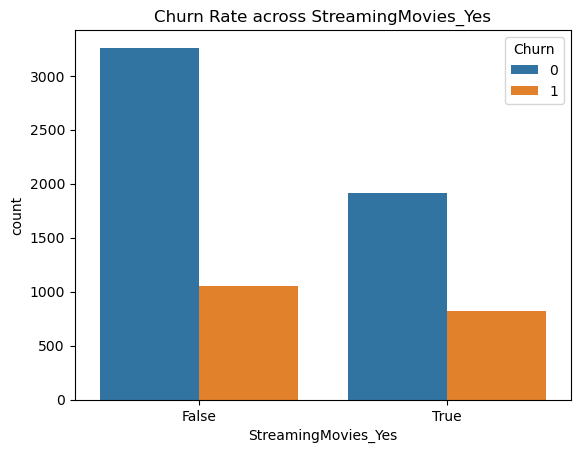

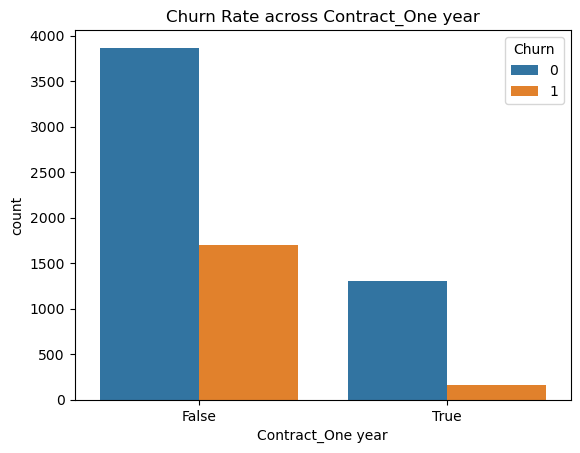

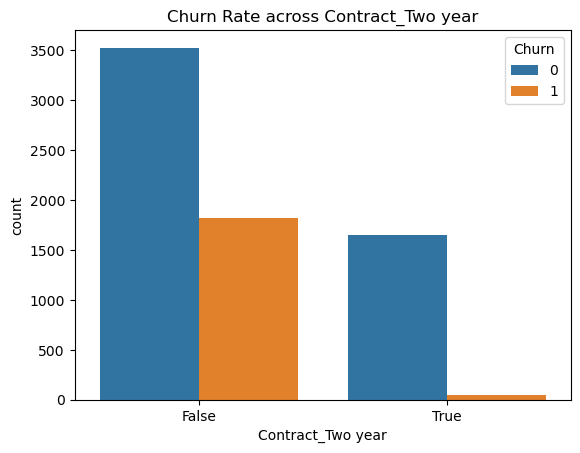

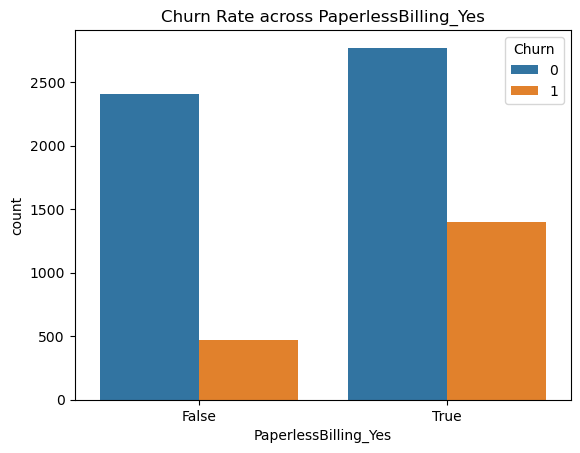

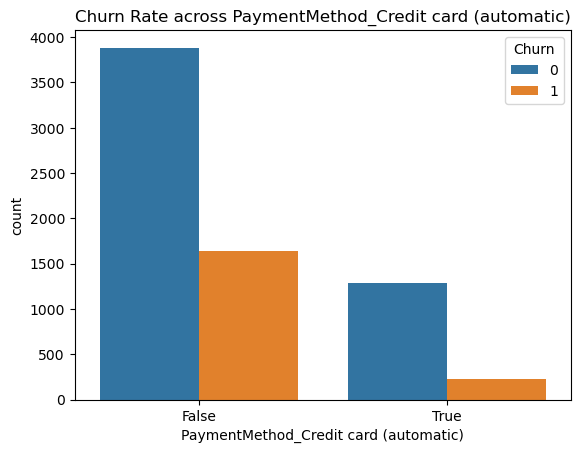

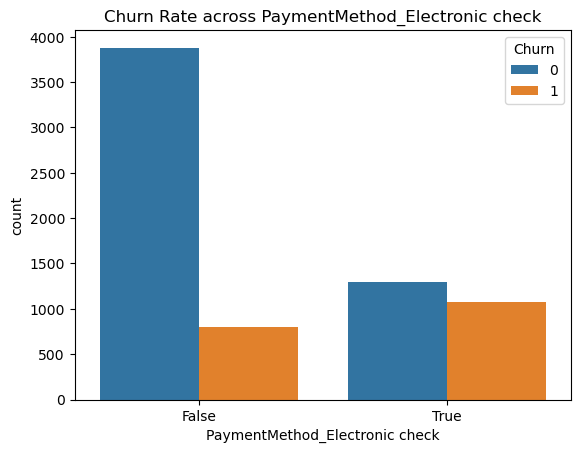

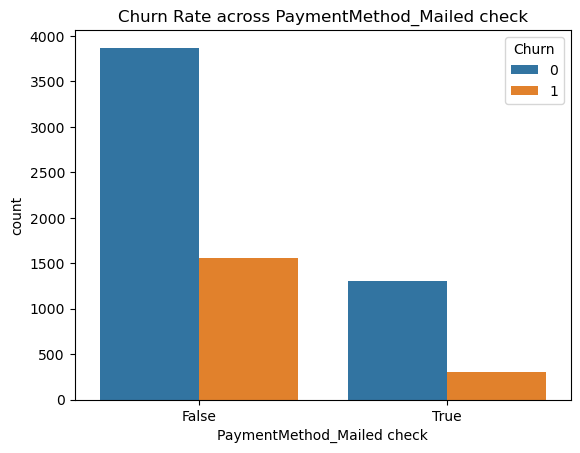

In [273]:
for feature in encoded_features:
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn Rate across {feature}')
    plt.show()

**Relationship Between Features and Churn**

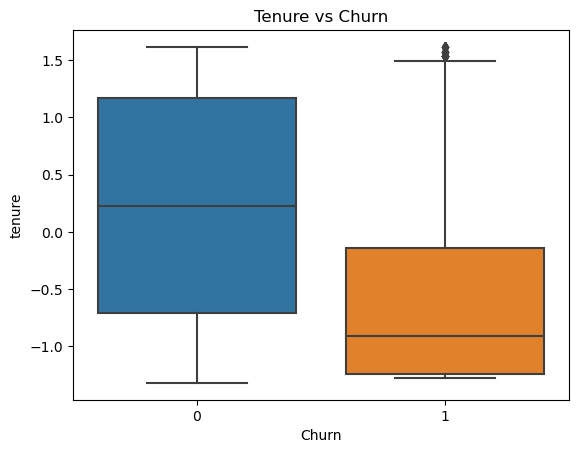

In [274]:
# Boxplot to analyze tenure vs churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

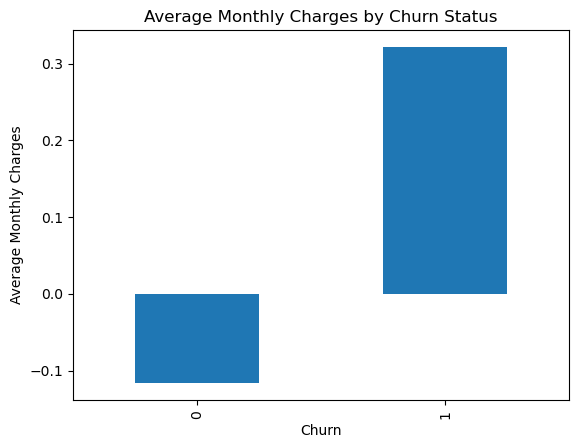

In [275]:
# Bar plot for average monthly charges per churn status
df.groupby('Churn')['MonthlyCharges'].mean().plot(kind='bar')
plt.title('Average Monthly Charges by Churn Status')
plt.ylabel('Average Monthly Charges')
plt.show()

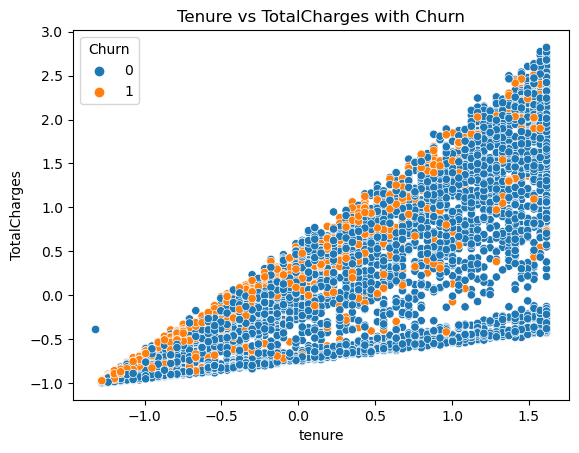

In [276]:
# Scatter plot to analyze the relationship between TotalCharges and tenure
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df)
plt.title('Tenure vs TotalCharges with Churn')
plt.show()

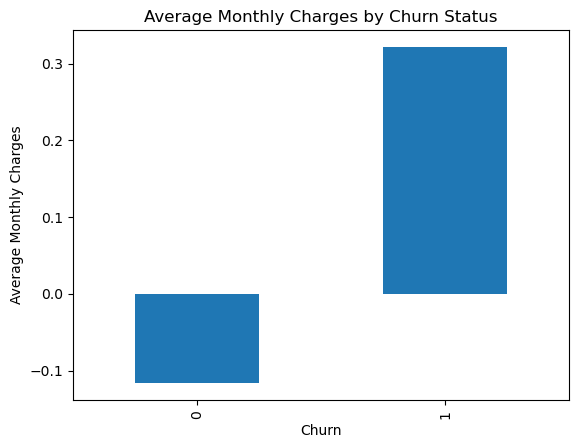

In [277]:
# Bar plot for average monthly charges per churn status
df.groupby('Churn')['MonthlyCharges'].mean().plot(kind='bar')
plt.title('Average Monthly Charges by Churn Status')
plt.ylabel('Average Monthly Charges')
plt.show()

In [278]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure_MonthlyCharges', 'AvgMonthlyCharge', 'Log_TotalCharges',
       'TenureGroup', 'IsSeniorCitizen', 'HasDependentsAndPartner',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
 

In [279]:
# Segment by contract type and payment method
behavior_segments = df.groupby(['Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes','PaymentMethod_Credit card (automatic)',
                                'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',])['Churn'].mean().reset_index()
print(behavior_segments)


    Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0               False              False                 False   
1               False              False                 False   
2               False              False                 False   
3               False              False                 False   
4               False              False                  True   
5               False              False                  True   
6               False              False                  True   
7               False              False                  True   
8               False               True                 False   
9               False               True                 False   
10              False               True                 False   
11              False               True                 False   
12              False               True                  True   
13              False               True                  True   
14        

In [280]:
df['TotalServices'] = (df['OnlineSecurity_Yes'].astype(int) + 
                       df['OnlineBackup_Yes'].astype(int) + 
                       df['DeviceProtection_Yes'].astype(int) + 
                       df['TechSupport_Yes'].astype(int) +
                       df['StreamingTV_Yes'].astype(int) +
                       df['StreamingMovies_Yes'].astype(int))


In [281]:
# Segment by number of services subscribed to
df['ServiceLevel'] = pd.cut(df['TotalServices'], bins=[0, 2, 4, 6], labels=['Low', 'Medium', 'High'])
service_segments = df.groupby('ServiceLevel')['Churn'].mean().reset_index()
print(service_segments)

  ServiceLevel     Churn
0          Low  0.406203
1       Medium  0.251777
2         High  0.100585


In [282]:
# Segment by senior citizen status and gender
demographic_segments = df.groupby(['IsSeniorCitizen', 'gender_Male'])['Churn'].mean().reset_index()
print(demographic_segments)


   IsSeniorCitizen  gender_Male     Churn
0                0        False  0.239384
1                0         True  0.232808
2                1        False  0.422535
3                1         True  0.411150


In [283]:
# Segment by tenure groups
tenure_segments = df.groupby('TenureGroup')['Churn'].mean().reset_index()
print(tenure_segments)


   TenureGroup     Churn
0            0  0.476782
1            1  0.287109
2            2  0.203890
3            3  0.144231
4            4  0.066098
5            5  0.000000


In [284]:
# Segment by customer service usage
if 'CustomerServiceCalls' in df.columns:
    support_segments = df.groupby('HighServiceUsage')['Churn'].mean().reset_index()
    print(support_segments)


In [285]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting relevant features for clustering
features = df[['tenure', 'MonthlyCharges', 'TotalServices']]
features_scaled = StandardScaler().fit_transform(features)

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['CustomerSegment'] = kmeans.fit_predict(features_scaled)

# Analyzing churn rate by segments
segment_analysis = df.groupby('CustomerSegment')['Churn'].mean().reset_index()
print(segment_analysis)


c:\Users\mamai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   CustomerSegment     Churn
0                0  0.470935
1                1  0.143929
2                2  0.153553


# Model Development

**Train-Test Split**

In [286]:
from sklearn.model_selection import train_test_split

In [287]:
df.isna().sum()

SeniorCitizen                               0
tenure                                      0
MonthlyCharges                              0
TotalCharges                                0
Churn                                       0
Tenure_MonthlyCharges                       0
AvgMonthlyCharge                            0
Log_TotalCharges                            0
TenureGroup                                 0
IsSeniorCitizen                             0
HasDependentsAndPartner                     0
gender_Male                                 0
Partner_Yes                                 0
Dependents_Yes                              0
PhoneService_Yes                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                          0
OnlineBackup_No internet service  

In [288]:
# Example: Fill NaNs with a specific value or drop rows/columns
df = df.fillna('Zero')  # or df.dropna() depending on your strategy

TypeError: Cannot setitem on a Categorical with a new category (Zero), set the categories first

In [ ]:
X = df.drop(columns=['Churn'])  # Drop unnecessary columns
y = df['Churn'].map({'Yes': 1, 'No': 0})    

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Models

**Logistic Regression**

In [289]:
X_train.dtypes

SeniorCitizen                               int64
tenure                                    float64
MonthlyCharges                            float64
TotalCharges                              float64
Tenure_MonthlyCharges                     float64
AvgMonthlyCharge                          float64
Log_TotalCharges                          float64
TenureGroup                                 int64
IsSeniorCitizen                             int64
HasDependentsAndPartner                     int64
gender_Male                                  bool
Partner_Yes                                  bool
Dependents_Yes                               bool
PhoneService_Yes                             bool
MultipleLines_No phone service               bool
MultipleLines_Yes                            bool
InternetService_Fiber optic                  bool
InternetService_No                           bool
OnlineSecurity_No internet service           bool
OnlineSecurity_Yes                           bool


In [ ]:
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Tenure_MonthlyCharges,AvgMonthlyCharge,Log_TotalCharges,TenureGroup,IsSeniorCitizen,HasDependentsAndPartner,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalServices,ServiceLevel,CustomerSegment
2142,0,-0.463037,0.002935,-0.417250,1361.85,63.657143,7.198782,1,0,0,...,True,True,False,False,False,False,True,3,Medium,0
1623,0,0.880735,1.078118,1.257128,5248.80,94.989815,8.542949,3,0,0,...,True,False,True,True,False,False,False,3,Medium,2
6074,0,-1.277445,-1.373033,-0.997067,23.45,23.450000,3.196630,0,0,0,...,False,False,False,True,False,True,False,0,NaN,1
1362,0,-1.155283,0.180747,-0.902370,280.80,59.487500,5.476254,0,0,0,...,False,False,False,True,False,True,False,0,NaN,0
6754,0,-1.318165,-0.095111,-0.390463,0.00,70.373239,7.243138,5,0,0,...,False,False,True,True,False,False,False,3,Medium,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluation
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("AUC:", roc_auc_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


ValueError: Cannot cast object dtype to float64

**Random Forest**